## Group 5 HW 25 Jan

#### Name List
* Jiayu ZHOU  
* Xiaochen YAN  
* Qinxuan ZHANG  
* Chang WANG  
* Shaobo ZHAO

## Museum Assignment
a) Plot $sin(x)$ and $cos(x)$ functions with $x \in [-\pi, \pi]$. Blue line for $sin$ and green line for $cos$.

b) Show the cross points of the two functions, and label their values on the x and y axes as folllows.



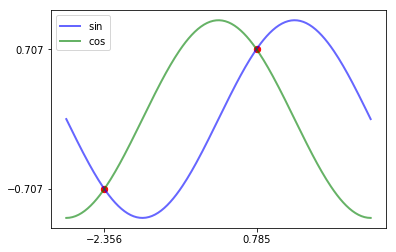

In [33]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import bisect
fig, ax = plt.subplots()
x = np.linspace(-np.pi,np.pi, 200)
y = np.sin(x)
z = np.cos(x)
ax.plot(x, y, 'b-', linewidth=2, label=r'$\sin$', alpha=0.6)
ax.plot(x, z, 'g-', linewidth=2, label=r'$\cos$', alpha=0.6)
f=lambda x: np.sin(x)-np.cos(x)
plt.scatter(bisect(f,-np.pi,0), np.sin(bisect(f,-np.pi,0)) , 40, color='red', alpha=1)
plt.scatter(bisect(f,0,np.pi), np.sin(bisect(f,0,np.pi)) , 40, color='red', alpha=1)
ax.legend(loc='upper left')
ax.set_yticks([np.sin(bisect(f,-np.pi,0)),np.sin(bisect(f,0,np.pi))])
ax.set_xticks([bisect(f,-np.pi,0),bisect(f,0,np.pi)])
plt.show()

## Scipy Exercises

Question 1:

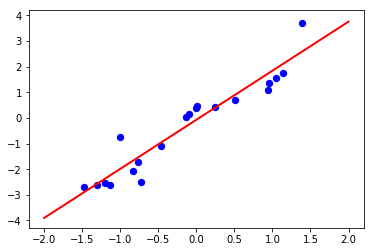

In [40]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

x = np.random.randn(20)
y = 2 * x + 0.5 * np.random.randn(20)
gradient, intercept, r_value, p_value, std_err = linregress(x, y)

n = np.linspace(-2,2,100)
m = intercept + gradient*n

fig, ax = plt.subplots()
ax.plot(n,m,'r-',linewidth=2)
plt.scatter(x, y , 40, color='blue')

plt.show()

Question 2

In [41]:
from scipy.optimize import fsolve

def f(x):
    x1,x2=x.tolist()
    return [
        x1**2-3*x1+7-385,
        x2**2-3*x2+7-385
    ]

r = fsolve(f,[-10,10])
print(r)

[-18.  21.]


Question 3

In [1]:
import numpy as np
import sys

def bisect_myown(f,a,b,accuracy=0.001):
    mid=(b+a)/2
    while b-a>accuracy:
        sys.setrecursionlimit(1000)
        if f(mid)*f(a)<0:
            b=mid
            bisect_myown(f,a,mid,accuracy)
        else:
            a=mid
            bisect_myown(f,mid,b,accuracy)
    return print(mid)  



### More Exercises on Essentials, Numpy, Matplotlib and SciPy

### Exercise 1
Generating an array of 10,000,000 random numbers, then set its negative elements to 0.  
You are requried to provide **three** implementations: one *using loop*, two *without using loop*.   
Please compare their performance by using the $\%time$ magic command on each implementation.

In [16]:
import numpy as np

x=np.random.randn(10000000)
for i in range(len(x)):
    if x[i]<0:
        x[i]=0
%time

Wall time: 0 ns


In [12]:
x=np.random.randn(10000000)
x[x[:]<0]=0
%time

Wall time: 0 ns


In [13]:
n = np.random.randn(10000000)
n = np.where(n<0,0,n)
%time

Wall time: 0 ns


### Exercise 2
Generate a $4 x k$ matrix, where $k$ is an input given by user, this matrix should look like this:  
[  
 [0, 4, 8, ..., 4(k-1)],  
 [1, 5, 9, ..., 4(k-1)+1],  
 [2, 6,10, ..., 4(k-1)+2],  
 [3, 7,11, ..., 4(k-1)+3]  
]  
**Note:** try to avoid using loop, and implement it in less than 4 lines of code.

In [6]:
import numpy as np
def ge_matrix(k):
    return np.arange(0,4*k).reshape(4,-1,order='F')

In [38]:
ge_matrix(5)

array([[ 0,  4,  8, 12, 16],
       [ 1,  5,  9, 13, 17],
       [ 2,  6, 10, 14, 18],
       [ 3,  7, 11, 15, 19]])

### Exercise 3
Write a function $gcd(a, b)$ to compute the *Greatest Common Divisor* for two naturals $a$ and $b$, which are provided by user input. Then write a function $lcm(a, b)$ by making use of your $gcd$ function to compute the *Least Common Multiple* for $a$ and $b$. Your $gcd$ function should present the result as well as the process on finding the result like below:  

gcd(123456, 7890)  
0: gcd(123456, 7890)  
1: gcd(7890, 5106)  
2: gcd(5106, 2784)  
3: gcd(2784, 2322)  
4: gcd(2322, 462)  
5: gcd(462, 12)  
6: gcd(12, 6)  
Out[595]:  
6


In [6]:
def gcd(a,b):
    print('gcd({0},{1})'.format(a,b))
    if a%b!=0:
        a,b=b,a%b
        return gcd(a,b)
    else:
        return b
    

In [5]:
gcd(100,8)

gcd(100,8)
gcd(8,4)


4

In [142]:
def lcm(a,b):
    return a*b/gcd(a,b)

In [143]:
x=lcm(123456,7890)
x

gcd(123456,7890)
gcd(7890,5106)
gcd(5106,2784)
gcd(2784,2322)
gcd(2322,462)
gcd(462,12)
gcd(12,6)


162344640.0

### Exercise 4
Write a function to remove redundant white spaces from a line of text.  
e.g. '$This\ is \ \ \ \ \ \ \ \ \ \ \ for\ removing \ \ \ \ \ \ \ redundant\ spaces$'   
=>  '$This\ is\ for\ removing\ redundant\ spaces$'   

**Note**: try to avoid using loop, check out the built-in functions of Python

In [148]:
def re_whitespace(str):
     return ' '.join(str.split())

In [149]:
re_whitespace('This is    for removing       redundant spaces')

'This is for removing redundant spaces'

### Exercise 5
Given an array, e.g., [2, 18, 9, 22, 17, 24, 8, 12, 27],  
generate a subarry from elements which are multiples of 3, e.g., [18, 9, 24, 12, 27]   

**Note**: try to avoid using loop, check out the built-in functions of Python

In [157]:
import numpy as np
a=np.array((2,18,9,22,17,24,8,12,27))
b=a[a%3==0]
b

array([18,  9, 24, 12, 27])

### Exercise 6
Read a text file, get the 20 most frequent words from the text file, output the words as well as their counts.  
**Note:** 
1. You should exclude punctuations such as ", . ! # $ ...". In other words, only count English words
2. You should provide a dictionary to your code which exclude counting any word in this list, e.g., a dictionray may look like this: [to, a, as, this, for, in, on, but].

**Hint: ** You may need some knowledge on regular expressions and its usage in Python.

In [2]:
from collections import Counter
f = open('Walden.txt', 'r')
text = f.read()
lower_text = text.lower()
word=lower_text.split()
dictionary = ['to','a','as','this','for','in','on','but','the','and','of','i']
temp_list=[]
for w in word:  
    if w not in dictionary:  
        temp_list.append(w)  
print (Counter(temp_list).most_common(20))

FileNotFoundError: [Errno 2] No such file or directory: 'Walden.txt'

### Exercise 7
Given a large integer N, find out all the prime numbers less than N. You may optimize your program in multiple passes, and compare their performance to evaluate your improvent.   

**Note:** Suppose initially the only prime number that your program knows is 2.

In [1]:
import numpy as np
k=100
print(2)
for j in range(3,k,2):
    for i in range(2,int(np.sqrt(j))+1):
        if j%i==0:
            break
    else:
        print(j)

2
3
5
7
11
13
17
19
23
29
31
37
41
43
47
53
59
61
67
71
73
79
83
89
97


In [6]:
from collections import Counter
help(collections.Counter)

NameError: name 'collections' is not defined